In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt 

climate_data_i = pd.read_csv('https://raw.githubusercontent.com/HeardLibrary/digital-scholarship/master/data/codegraf/mesa2880172.csv')

climate_data_i['YEAR'] = climate_data_i['DATE'].str.slice(0, 4)
climate_data_i['MONTH'] = climate_data_i['DATE'].str.slice(5, 7)
climate_data_i

,STATION,NAME,DATE,CDSD,DSND,DSNW,EMNT,EMSD,EMSN,EMXP,EMXT,HDSD,PRCP,SNOW,TAVG,TMAX,TMIN,YEAR,MONTH
0,USC00025467,"MESA, AZ US",1896-03,NaN,0.0,0.0,1.1,0.0,0.0,9.9,35.0,NaN,11.7,0.0,16.7,24.9,8.4,1896,03
1,USC00025467,"MESA, AZ US",1896-04,NaN,0.0,0.0,4.4,0.0,0.0,0.8,35.6,NaN,0.8,0.0,18.3,28.0,8.7,1896,04
2,USC00025467,"MESA, AZ US",1896-06,NaN,0.0,0.0,15.6,0.0,0.0,0.0,46.7,NaN,0.0,0.0,31.2,41.9,20.5,1896,06
3,USC00025467,"MESA, AZ US",1896-07,NaN,0.0,0.0,12.2,0.0,0.0,22.9,43.3,0.0,86.5,0.0,28.6,38.4,18.8,1896,07
4,USC00025467,"MESA, AZ US",1896-08,NaN,0.0,0.0,16.1,0.0,0.0,2.3,43.3,0.0,6.7,0.0,29.9,37.1,22.8,1896,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,USC00025467,"MESA, AZ US",2017-05,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,2017,05
1417,USC00025467,"MESA, AZ US",2017-06,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2017,06
1418,USC00025467,"MESA, AZ US",2017-07,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.3,NaN,NaN,NaN,NaN,2017,07
1419,USC00025467,"MESA, AZ US",2017-08,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,38.6,NaN,NaN,NaN,NaN,2017,08


In [2]:
year_list = []
for year in range(1896, 2018):
    year_list.append(year)

In [3]:
ppt_avg = []
for year in year_list:
    df_slice = climate_data_i[climate_data_i['YEAR'] == str(year)]
    avg_for_year = df_slice['PRCP'].mean()
    if not np.isnan(avg_for_year):
        year_dict = {'Year': year, 'Avg_PPT': avg_for_year}
        ppt_avg.append(year_dict)

ppt_avg_df = pd.DataFrame(ppt_avg)
ppt_avg_df

,Year,Avg_PPT
0,1896,25.187500
1,1897,19.041667
2,1898,16.591667
3,1899,11.675000
4,1900,10.791667
...,...,...
115,2013,22.200000
116,2014,20.108333
117,2015,20.416667
118,2016,11.572727


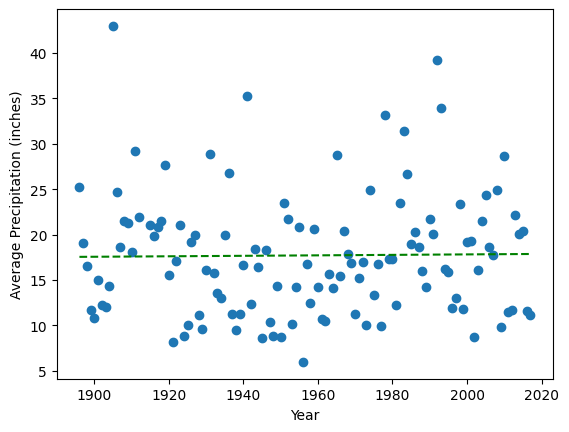

In [4]:
fig_ppt_avg = plt.figure()
ax = fig_ppt_avg.add_subplot(1,1,1)

ax.scatter(ppt_avg_df['Year'], ppt_avg_df['Avg_PPT'])
ax.set_xlabel('Year')
ax.set_ylabel('Average Precipitation (inches)')

s = np.polyfit(ppt_avg_df['Year'], ppt_avg_df['Avg_PPT'], 1)
d = np.poly1d(s)
ax.plot(ppt_avg_df['Year'], d(ppt_avg_df['Year']), 'g--')

In [5]:
temp_avg = []
for year in year_list:
    df_slice2 = climate_data_i[climate_data_i['YEAR'] == str(year)]
    avgT_for_year = df_slice2['TAVG'].mean()
    if not np.isnan(avgT_for_year):
        Tyear_dict = {'Year': year, 'Avg_TEMP': avgT_for_year}
        temp_avg.append(Tyear_dict)

temp_avg_df = pd.DataFrame(temp_avg)
temp_avg_df

,Year,Avg_TEMP
0,1896,21.437500
1,1897,20.150000
2,1898,20.225000
3,1899,19.491667
4,1900,20.691667
...,...,...
86,1984,21.750000
87,1985,21.933333
88,1986,21.250000
89,1987,22.325000


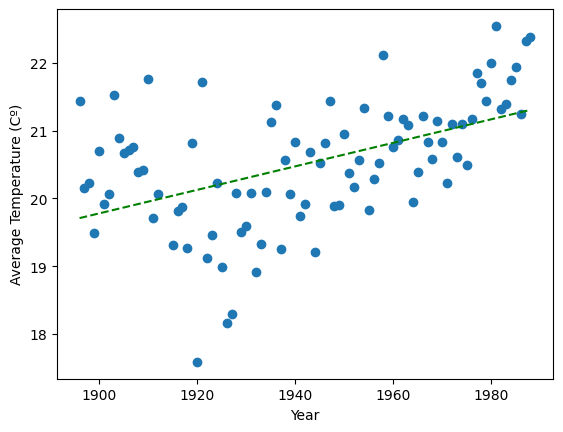

In [6]:
fig_temp_avg = plt.figure()
ax = fig_temp_avg.add_subplot(1,1,1)

ax.scatter(temp_avg_df['Year'], temp_avg_df['Avg_TEMP'])
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature (Cº)')

q = np.polyfit(temp_avg_df['Year'], temp_avg_df['Avg_TEMP'], 1)
w = np.poly1d(q)
ax.plot(temp_avg_df['Year'], w(temp_avg_df['Year']), 'g--')

In [7]:
month_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [8]:
month_ppt_avg = []
for month in month_list:
    df_slice_month = climate_data_i[climate_data_i['MONTH'] == str(month)]
    avgP_for_month = df_slice_month['PRCP'].mean()
    monthP_dict = {'Month': month, 'Avg_PRCP': avgP_for_month}
    month_ppt_avg.append(monthP_dict)

month_ppt_avg_df = pd.DataFrame(month_ppt_avg)
month_ppt_avg_df

,Month,Avg_PRCP
0,01,23.711966
1,02,22.303390
2,03,22.557265
3,04,8.616667
4,05,3.804202
5,06,2.125210
6,07,23.752500
7,08,29.233613
8,09,20.482353
9,10,14.197458


Text(0, 0.5, 'Average Precipitation (inches)')

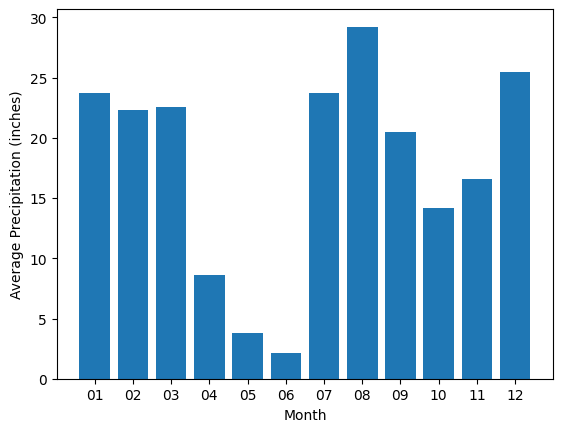

In [9]:
fig_ppt_avg_mon = plt.figure()
ax = fig_ppt_avg_mon.add_subplot(1,1,1)

ax.bar(month_ppt_avg_df['Month'], month_ppt_avg_df['Avg_PRCP'])
ax.set_xlabel('Month')
ax.set_ylabel('Average Precipitation (inches)')

In [10]:
month_temp_avg = []
for month in month_list:
    df_slice3 = climate_data_i[climate_data_i['MONTH'] == str(month)]
    avgT_for_month = df_slice3['TAVG'].mean()
    lower_deviation = df_slice3['TAVG'].mean() - df_slice3['TMIN'].mean()
    upper_deviation = df_slice3['TMAX'].mean() - df_slice3['TAVG'].mean()
    if not np.isnan(avgT_for_month):
        Tmonth_dict = {'Month': month, 'Avg_TEMP': avgT_for_month, 'lower deviation' : lower_deviation, 'upper deviation' : upper_deviation}
        month_temp_avg.append(Tmonth_dict)

month_temp_avg_df = pd.DataFrame(month_temp_avg)
month_temp_avg_df

,Month,Avg_TEMP,lower deviation,upper deviation
0,01,10.388372,8.080233,8.080233
1,02,12.378652,8.293258,8.284270
2,03,14.977528,8.595506,8.596629
3,04,18.952222,9.293333,9.293333
4,05,23.411364,9.838636,9.842045
5,06,28.513793,10.141883,10.136207
6,07,31.587640,8.315418,8.324719
7,08,30.605814,8.020587,8.012791
8,09,27.601149,8.935240,8.914943
9,10,21.423864,9.365437,9.319318


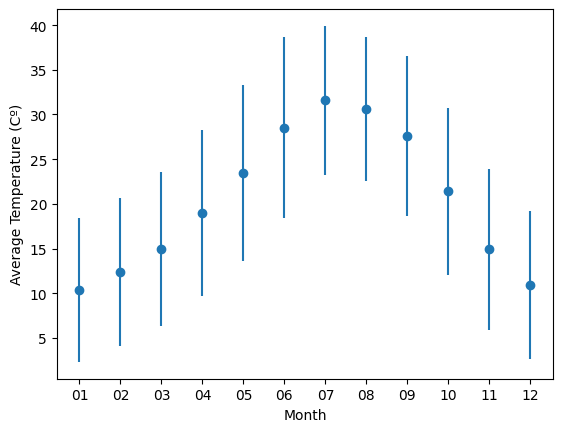

In [11]:
#Create an error bar plot for the average temperature by month
fig_temp_avg_mon = plt.figure()

ax = fig_temp_avg_mon.add_subplot(1,1,1)
ax.errorbar(month_temp_avg_df['Month'], month_temp_avg_df['Avg_TEMP'], yerr=[month_temp_avg_df['lower deviation'], month_temp_avg_df['upper deviation']], fmt='o')
ax.set_xlabel('Month')
ax.set_ylabel('Average Temperature (Cº)')
plt.show()